In [1]:
import cv2

In [2]:
catshow=cv2.imread('./C&D/train/cat/cat.3102.jpg')
dogshow=cv2.imread('./C&D/train/dog/dog.3102.jpg')

In [3]:
import matplotlib.pyplot as plt

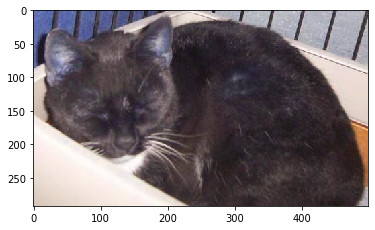

In [4]:
plt.imshow(catshow)

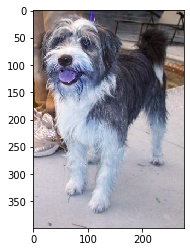

In [5]:
plt.imshow(dogshow)

In [6]:
type(dogshow)

numpy.ndarray

In [7]:
type(catshow)

numpy.ndarray

In [8]:
print(dogshow.shape)

(399, 276, 3)


In [9]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\Shikhar\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shikhar\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shikhar\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shikhar\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [10]:
train_datagen=ImageDataGenerator(
    rotation_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    rescale=1/255.0)

In [11]:
test_datagen=ImageDataGenerator(
    rotation_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    rescale=1/255.0)

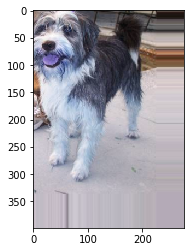

In [12]:
plt.imshow(train_datagen.random_transform(dogshow))

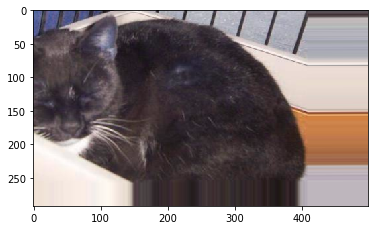

In [13]:
plt.imshow(train_datagen.random_transform(catshow))

In [14]:
trainflow=train_datagen.flow_from_directory(
    './C&D/train',
    target_size=(140,140),
    class_mode='binary',
)

Found 18796 images belonging to 2 classes.


In [15]:
validationflow=test_datagen.flow_from_directory(
    './C&D/test',
    target_size=(140,140),
    class_mode='binary',
)

Found 6204 images belonging to 2 classes.


In [16]:
from keras.models import Sequential

In [17]:
from keras.layers import Conv2D

In [18]:
from keras.layers import MaxPooling2D,BatchNormalization

In [19]:
from keras.layers import Flatten,Dense,Dropout

In [20]:
model=Sequential()

In [21]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(140,140,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 138, 138, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 69, 69, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 67, 67, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)       

In [24]:
model.fit_generator(
    trainflow,
    epochs=20,
    steps_per_epoch=180,
    validation_data=validationflow,
    validation_steps=90,
)


Epoch 1/20
180/180 [==============================] - 324s 2s/step - loss: 0.6969 - accuracy: 0.5205 - val_loss: 0.6803 - val_accuracy: 0.5594
Epoch 2/20
180/180 [==============================] - 311s 2s/step - loss: 0.6734 - accuracy: 0.5578 - val_loss: 0.6592 - val_accuracy: 0.5399
Epoch 3/20
180/180 [==============================] - 259s 1s/step - loss: 0.6616 - accuracy: 0.5899 - val_loss: 0.5984 - val_accuracy: 0.6061
Epoch 4/20
180/180 [==============================] - 225s 1s/step - loss: 0.6509 - accuracy: 0.6175 - val_loss: 0.5946 - val_accuracy: 0.6566
Epoch 5/20
180/180 [==============================] - 227s 1s/step - loss: 0.6299 - accuracy: 0.6464 - val_loss: 0.6286 - val_accuracy: 0.6513
Epoch 6/20
180/180 [==============================] - 231s 1s/step - loss: 0.6178 - accuracy: 0.6509 - val_loss: 0.5089 - val_accuracy: 0.6611
Epoch 7/20
180/180 [==============================] - 241s 1s/step - loss: 0.5963 - accuracy: 0.6786 - val_loss: 0.5979 - val_accuracy: 0.687

In [25]:
model.save('cad2.h5')

In [26]:
trainflow.class_indices

{'cat': 0, 'dog': 1}

In [42]:
import cv2

In [63]:
import matplotlib.pyplot as plt

In [68]:
img=cv2.imread('./C&D/test/cat/cat.20.jpg')

(374, 500, 3)

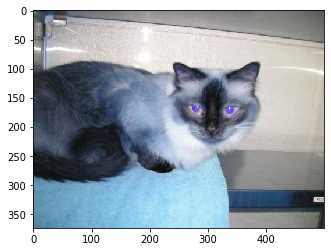

In [69]:
plt.imshow(img)
img.shape

In [70]:
imgg=cv2.resize(img,(140,140))

In [71]:
import numpy as np
img=imgg.reshape(1,140,140,3)

In [72]:
model.predict(img)

array([[0.]], dtype=float32)

In [73]:
model.predict_classes(img)

array([[0]])

(264, 299, 3)

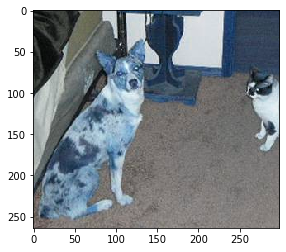

In [58]:
imggg=cv2.imread('./C&D/test/dog/dog.7.jpg')
plt.imshow(imggg)
imggg.shape

In [59]:
im=cv2.resize(imggg,(140,140))
imggg=im.reshape(1,140,140,3)

In [60]:
model.predict_classes(imggg)


array([[1]])

In [61]:
model.predict(imggg)

array([[1.]], dtype=float32)

In [85]:
print(model.history.history['val_loss'])

[0.6802629828453064, 0.6592038869857788, 0.5984359979629517, 0.5945504903793335, 0.6285829544067383, 0.5088545083999634, 0.5979350805282593, 0.4402683675289154, 0.4982036054134369, 0.4864104390144348, 0.5141180753707886, 0.5551900863647461, 0.5095876455307007, 0.46970635652542114, 0.43042492866516113, 0.4467589557170868, 0.6397647857666016, 0.3620627224445343, 0.5116209983825684, 0.6625345349311829]


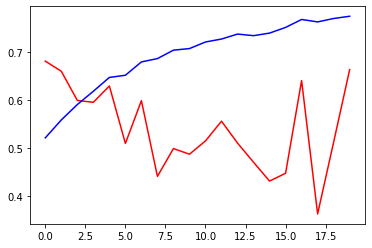

In [88]:
plt.plot(model.history.history['val_loss'],color='red')
plt.plot(model.history.history['accuracy'],color='blue')